@Author: Bhupinder Singh

@Date: 29-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 31-01-2023

@Title: Build a machine learning model to predict whether a person makes over 50K a
year or not


In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc

### Import the dataset 

In [203]:
data = pd.read_csv('classification_2.csv', sep=',')

In [204]:
data.columns =['age',	'workclass',	'fnlwgt',	'education'	,'education-num',	'marital-status',	'occupation',	'relationship'	,'race',	'sex',	'capital-gain'	,'capital-loss',	'hours-per-week',	'native-country','y']

### Getting Insights of dataset

In [205]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [206]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  y               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for Null values in data set

In [208]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
y                 0
dtype: int64

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  y               32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for Outliers in data set

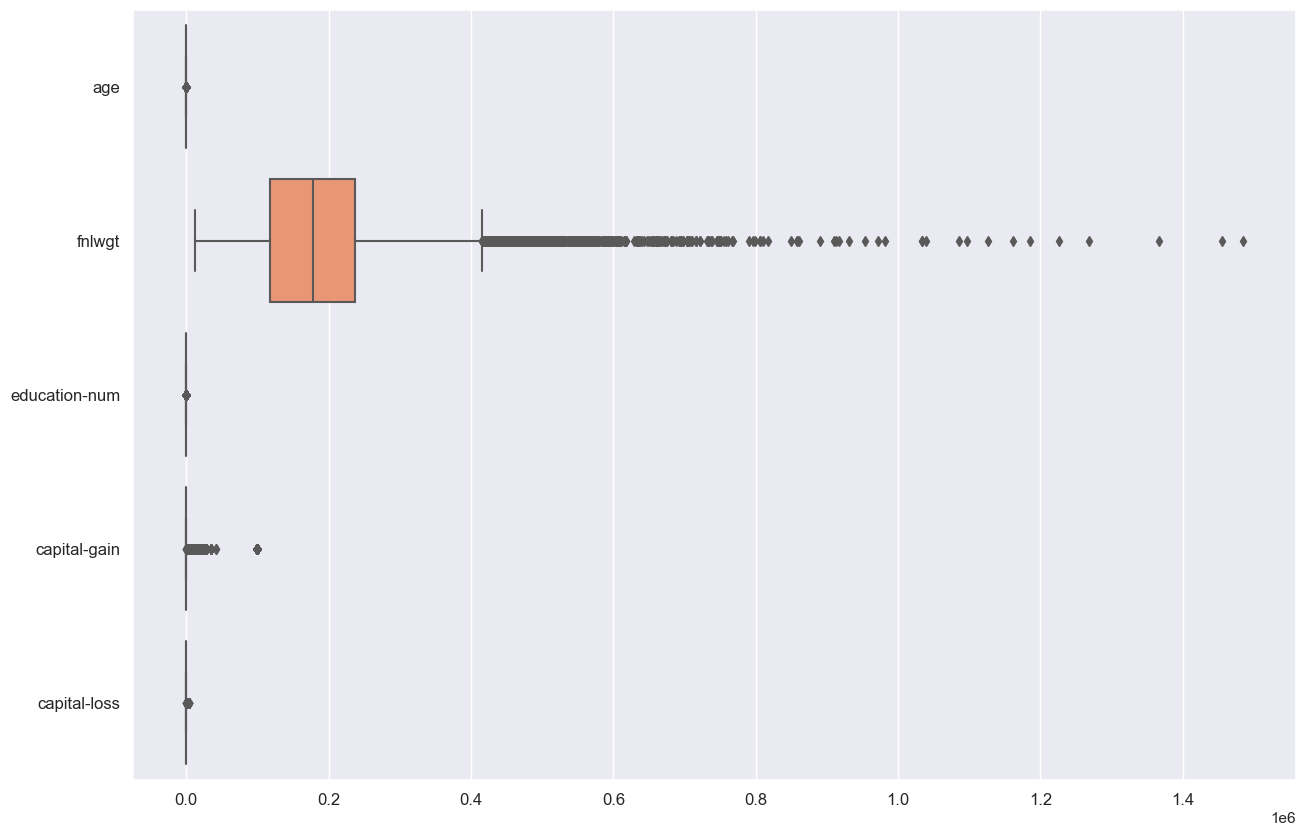

In [210]:
#create the plot
ax = sns.boxplot(data = data[['age','fnlwgt','education-num',	'marital-status','capital-gain'	,'capital-loss']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [211]:
def cap_data(data):
    """
    Description:
            This function is used to remove outliers
    Parameter:
        data : Imported dataset
    Return:
            Returns the data without outliers
    """
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.88]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  workclass
capping the  fnlwgt
capping the  education
capping the  education-num
capping the  marital-status
capping the  occupation
capping the  relationship
capping the  race
capping the  sex
capping the  capital-gain
capping the  capital-loss
capping the  hours-per-week
capping the  native-country
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_10812\3429365897.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_10812\3429365897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


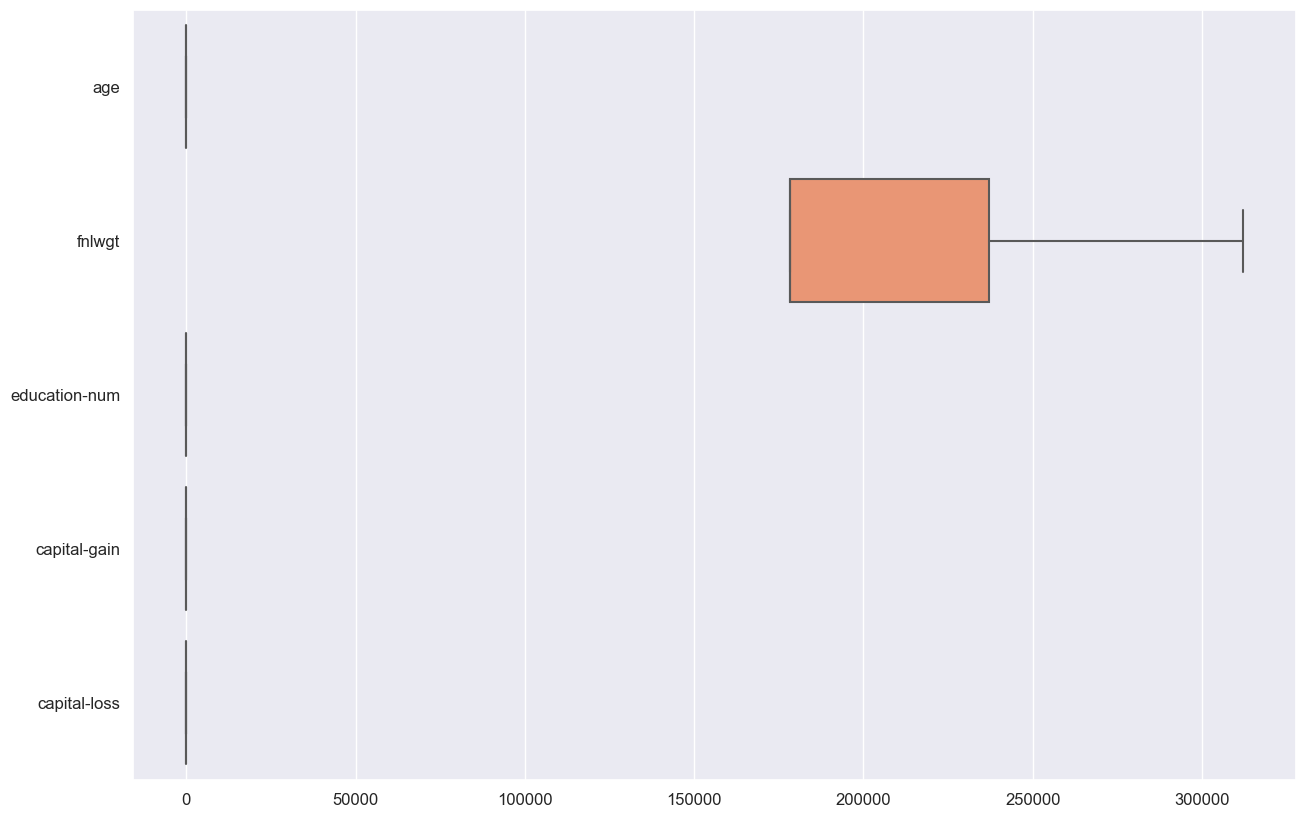

In [212]:

#create the plot
ax = sns.boxplot(data = data[['age','fnlwgt','education-num',	'marital-status','capital-gain'	,'capital-loss']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Replacing '?' with mode values

In [213]:
data = data.replace(' ?', np.NaN)
replace = data.fillna(data.mode().iloc[0], inplace=True)

data encoding

In [214]:
data.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,Self-emp-not-inc,178363.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
1,38,Private,215646.00,HS-grad,10,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721.00,11th,10,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,37,Private,312129.16,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582.00,Masters,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,178363.00,9th,10,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,40,Jamaica,<=50K
6,52,Self-emp-not-inc,209642.00,HS-grad,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,37,Private,178363.00,Masters,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
8,42,Private,178363.00,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
9,37,Private,280464.00,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,50,United-States,>50K


label encoding

In [215]:
data[ 'workclass' ] = data[ 'workclass' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
data['marital-status'] = data['marital-status'].astype( 'category') 
data['relationship'] = data['relationship'].astype( 'category' ) 
data['race'] = data['race'].astype( 'category' ).astype( 'category') 
data['sex'] = data['sex'].astype( 'category' ).astype( 'category' )
data['native-country'] = data['native-country'].astype( 'category' ).astype( 'category' )
data['occupation'] = data['occupation'].astype( 'category' ).astype( 'category' )


data['workclass'] = data['workclass'].cat.codes
data['education'] = data['education'].cat.codes
data['marital-status'] = data['marital-status'].cat.codes
data['relationship'] = data['relationship'].cat.codes
data['race'] = data['race'].cat.codes
data['sex'] = data['sex'].cat.codes
data['native-country'] = data['native-country'].cat.codes
data['occupation'] = data['occupation'].cat.codes

Binary encoding

In [216]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if (i == ' >50K'):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [217]:
row,col=data.shape
y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [218]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,50,5,178363.00,9,13,2,3,0,4,1,0,0,40,38,0
1,38,3,215646.00,11,10,0,5,1,4,1,0,0,40,38,0
2,53,3,234721.00,1,10,2,5,0,2,1,0,0,40,38,0
3,37,3,312129.16,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582.00,12,13,2,3,5,4,0,0,0,40,38,0
5,49,3,178363.00,6,10,3,7,1,2,0,0,0,40,22,0
6,52,5,209642.00,11,10,2,3,0,4,1,0,0,45,38,1
7,37,3,178363.00,12,13,4,9,1,4,0,0,0,50,38,1
8,42,3,178363.00,9,13,2,3,0,4,1,0,0,40,38,1
9,37,3,280464.00,15,10,2,3,0,2,1,0,0,50,38,1


vif

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  int64  
 1   workclass       32560 non-null  int8   
 2   fnlwgt          32560 non-null  float64
 3   education       32560 non-null  int8   
 4   education-num   32560 non-null  int64  
 5   marital-status  32560 non-null  int8   
 6   occupation      32560 non-null  int8   
 7   relationship    32560 non-null  int8   
 8   race            32560 non-null  int8   
 9   sex             32560 non-null  int8   
 10  capital-gain    32560 non-null  int64  
 11  capital-loss    32560 non-null  int64  
 12  hours-per-week  32560 non-null  int64  
 13  native-country  32560 non-null  int8   
 14  y               32560 non-null  int64  
dtypes: float64(1), int64(6), int8(8)
memory usage: 2.0 MB


In [220]:
data=data.drop(['capital-loss','capital-gain'],axis=1)

In [221]:
X = data[list(data.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
10,89.471917,hours-per-week
4,62.687920,education-num
11,34.285067,native-country
0,32.602303,age
8,19.743050,race
2,18.431196,fnlwgt
1,8.852685,workclass
3,8.049398,education
9,4.628544,sex
5,4.091896,marital-status


In [222]:
#data = data.drop(['hours-per-week','education-num','native-country','fnlwgt','race','workclass','age','education'], axis=1)
#data = data.drop(['native-country','fnlwgt','race','age'], axis=1)
#data = data.drop(['native-country','fnlwgt','race','age'], axis=1)
#X = data[['age','education'	,	'marital-status',	'occupation',	'relationship'	,	'sex']]
X = data[list(data.columns[:-1])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
10,89.471917,hours-per-week
4,62.687920,education-num
11,34.285067,native-country
0,32.602303,age
8,19.743050,race
2,18.431196,fnlwgt
1,8.852685,workclass
3,8.049398,education
9,4.628544,sex
5,4.091896,marital-status


### Feature Scaling

In [223]:
df = data[list(data.columns[:-1])]
for col in df.columns:
        print("Scaling the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64') | ((data[col].dtype)=='int8') | ((data[col].dtype)=='uint8')):
                data[col] = (data[col] - data[col].mean())/data[col].std()
print("Train data")
data.head(5)

Scaling the  age
Scaling the  workclass
Scaling the  fnlwgt
Scaling the  education
Scaling the  education-num
Scaling the  marital-status
Scaling the  occupation
Scaling the  relationship
Scaling the  race
Scaling the  sex
Scaling the  hours-per-week
Scaling the  native-country
Train data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,y
0,1.063204,1.721309,-0.706384,-0.335438,1.658533,-0.406177,-0.790144,-0.900163,0.393668,0.703077,-0.610077,0.261370,0
1,-0.624782,-0.085222,0.062024,0.181316,-0.656956,-1.733999,-0.286698,-0.277805,0.393668,0.703077,-0.610077,0.261370,0
2,1.485200,-0.085222,0.455163,-2.402452,-0.656956,-0.406177,-0.286698,-0.900163,-1.962553,0.703077,-0.610077,0.261370,0
3,-0.765447,-0.085222,2.050557,-0.335438,1.658533,-0.406177,0.720193,2.211624,-1.962553,-1.422276,-0.610077,-5.352773,0
4,-0.765447,-0.085222,1.482806,0.439693,1.658533,-0.406177,-0.790144,2.211624,0.393668,-1.422276,-0.610077,0.261370,0


###  Split the dataset into training set and test set

In [224]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,y
0,1.063204,1.721309,-0.706384,-0.335438,1.658533,-0.406177,-0.790144,-0.900163,0.393668,0.703077,-0.610077,0.261370,0
1,-0.624782,-0.085222,0.062024,0.181316,-0.656956,-1.733999,-0.286698,-0.277805,0.393668,0.703077,-0.610077,0.261370,0
2,1.485200,-0.085222,0.455163,-2.402452,-0.656956,-0.406177,-0.286698,-0.900163,-1.962553,0.703077,-0.610077,0.261370,0
3,-0.765447,-0.085222,2.050557,-0.335438,1.658533,-0.406177,0.720193,2.211624,-1.962553,-1.422276,-0.610077,-5.352773,0
4,-0.765447,-0.085222,1.482806,0.439693,1.658533,-0.406177,-0.790144,2.211624,0.393668,-1.422276,-0.610077,0.261370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.062120,-0.085222,-0.706384,0.181316,-0.656956,-0.406177,1.727085,-0.900163,0.393668,0.703077,-0.610077,0.261370,0
26044,-0.765447,-0.085222,-0.706384,0.181316,-0.656956,-0.406177,-0.286698,-0.900163,0.393668,0.703077,-0.610077,0.261370,0
26045,-0.765447,-0.085222,-0.706384,-0.852191,0.886704,0.921646,1.475362,-0.277805,0.393668,-1.422276,-0.610077,0.261370,0
26046,-0.202786,2.624575,-0.706384,-0.335438,1.658533,-0.406177,-0.538421,-0.900163,0.393668,0.703077,-0.610077,0.261370,1


Test dataframe


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,y
26048,-0.765447,-0.085222,0.071979,0.181316,-0.656956,0.921646,0.216748,0.966909,0.393668,0.703077,-0.610077,0.26137,0
26049,-0.765447,-0.085222,-0.479569,1.214823,-0.656956,-0.406177,1.727085,-0.900163,-1.962553,0.703077,-0.610077,0.26137,1
26050,-0.765447,-0.085222,-0.706384,1.214823,-0.656956,0.921646,0.720193,0.966909,0.393668,0.703077,-0.610077,0.26137,0
26051,-0.765447,-0.085222,1.928871,0.181316,-0.656956,0.921646,-0.286698,0.966909,0.393668,0.703077,-0.610077,0.26137,0
26052,-0.765447,-0.085222,2.050557,0.181316,-0.656956,-1.733999,1.727085,-0.277805,0.393668,0.703077,-0.610077,0.26137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.765447,-0.085222,0.920561,-0.852191,0.886704,-0.406177,1.475362,2.211624,0.393668,-1.422276,-0.610077,0.26137,0
32556,-0.343451,-0.085222,-0.706384,0.181316,-0.656956,-0.406177,-0.034975,-0.900163,0.393668,0.703077,-0.610077,0.26137,1
32557,1.907197,-0.085222,-0.706384,0.181316,-0.656956,2.249469,-1.545312,1.589267,0.393668,-1.422276,-0.610077,0.26137,0
32558,-0.765447,-0.085222,-0.229733,0.181316,-0.656956,0.921646,-1.545312,0.966909,0.393668,0.703077,-0.610077,0.26137,0


((26048, 13), (6512, 13))

### Extracting the values of features

In [225]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
print(m)
x_train=data_n[:,0:col-1].reshape(m,col-1)
x_train = np.append(np.ones((m,1)),x_train,axis=1)
y_train=data_n[:,-1].reshape(m,1)

26048


In [226]:
class MultilayerNeuralNetwork(object):
    """A Multilayer Perceptron class.
    """

    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        """
        Description:
            Constructor for the MultiLayerNeuralNetwork. Takes the number of inputs,
            a variable number of hidden layers, and number of outputs
        Parameter:
            num_inputs (int): Number of inputs
            hidden_layers (list): A list of ints for the hidden layers
            num_outputs (int): Number of outputs
        Return:
                None
        """

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):
        """
        Description:
            Computes forward propagation of the network based on input.
        Parameter:
            inputs : Input x features
        Return:
            activations : Output values
        """

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations


    def back_propagate(self, error):
        """
        Description: 
            Backpropogates an error values.
        Parameters:
            error: The error to backprop.
        Return:
            error: The final error of the input
        """

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        """
        Description:
            Trains model running forward prop and backprop
        Parameters:
            inputs (ndarray): X
            targets (ndarray): Y
            epochs (int): Num. epochs we want to train the network for
            learning_rate (float): Step to apply to gradient descent
        Return:
            None    
        """
        # now enter the training loop
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self._mse(target, output)

            # Epoch complete, report the training error
            print("Error: {} at epoch {}".format(sum_errors / len(y_train), i+1))

        print("Training complet")


    def gradient_descent(self, learningRate=1):
        """
        Description:
            Learns by descending the gradient
        Parameters:
            learningRate (float): How fast to learn.
        Return:
            None    
        """
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate


    def _sigmoid(self, x):
        """
        Description:
            Sigmoid activation function
        Parameters:
            x : Value to be processed
        Returns:
            y : converted sigmoid value
        """

        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):
        """
        Description:
            Sigmoid derivative function
        Parameters:
            x : Value to be processed
        Returns:
            y : converted sigmoid value
        """
        return x * (1.0 - x)


    def _mse(self, target, output):
        """
        Description:
            Mean Squared Error loss function
        Parameters:
            target : The ground truth
            output : The predicted values
        Returns:
            Mean Square Error
        """
        return np.average((target - output) ** 2)


if __name__ == "__main__":

    mlnn = MultilayerNeuralNetwork(13, [13,13], 1)

    # train network
    mlnn.train(x_train, y_train, 500, 0.1)

Error: 0.17430121773112991 at epoch 1
Error: 0.1377719569265308 at epoch 2
Error: 0.13537004807807484 at epoch 3
Error: 0.13250200203708049 at epoch 4
Error: 0.12801301359666895 at epoch 5
Error: 0.12538607886682712 at epoch 6
Error: 0.12432934977585795 at epoch 7
Error: 0.12362841870522688 at epoch 8
Error: 0.12303802765276815 at epoch 9
Error: 0.12253911603409814 at epoch 10
Error: 0.12211851885659292 at epoch 11
Error: 0.12176175197271598 at epoch 12
Error: 0.12145378893372606 at epoch 13
Error: 0.12118016390192138 at epoch 14
Error: 0.12092998480224064 at epoch 15
Error: 0.12069466487926957 at epoch 16
Error: 0.12046839560733229 at epoch 17
Error: 0.12024726940195145 at epoch 18
Error: 0.12002836191333749 at epoch 19
Error: 0.11981095277815641 at epoch 20
Error: 0.11959792475762707 at epoch 21
Error: 0.11939476271234727 at epoch 22
Error: 0.11920599271001418 at epoch 23
Error: 0.11903239693284011 at epoch 24
Error: 0.11887131617266414 at epoch 25
Error: 0.11871866400190868 at epoch

### Implementing Performances Metrices

### Accuracy 

In [227]:
rows,col=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col-1].reshape(m2,col-1)
x_test = np.append(np.ones((m2,1)),x_test,axis=1)
y_test=data_x[:,-1].reshape(m2,1)

In [228]:
y_pred = mlnn.forward_propagate(x_test)

In [229]:
for i in range(0,len(y_pred)):
    if(y_pred[i]>=0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

In [230]:
def Evaluate(y_test, y_pred):
    """
    Description:
        Function to evaluate the accuracy of the model
    Parameter:
        y_test : y value of dataset
        y_pred : pred  of test row
    Return: 
        return the accuracy
    """
    
    n_correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_test)
    return acc

In [231]:
Evaluate(y_test, y_pred)

0.8249385749385749